# EE 628 - Final Project

# Dogs vs. Cats

An algorithm to distinguish dogs from cats

Importing and Reading training and testing data

In [2]:
import os
import zipfile
import pandas as pd
from shutil import copyfile
from random import seed
from random import random
import numpy as np
from os import listdir
import shutil

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread 
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [3]:
zip_path = 'dogs-vs-cats.zip'

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/project')


path = '/project/train.zip'
# Open the ZIP file and extract its contents
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/project/train')
    
# base directory where images are extracted
base_dir = '/project/train/train'

# Ensure only files are listed, not directories
img_names = [f for f in os.listdir(base_dir) if os.path.isfile(os.path.join(base_dir, f))]

# Display the first 10 image names
print(img_names[:10])

# Display image details for the first 10 image files
for img_name in img_names[:10]:
    img_path = os.path.join(base_dir, img_name)
    try:
        with Image.open(img_path) as img:
            print(f"{img_name}: {img.size}")
    except IOError:
        print(f"Cannot open {img_name}")


['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
cat.0.jpg: (500, 374)
cat.1.jpg: (300, 280)
cat.10.jpg: (489, 499)
cat.100.jpg: (403, 499)
cat.1000.jpg: (150, 149)
cat.10000.jpg: (431, 359)
cat.10001.jpg: (500, 374)
cat.10002.jpg: (499, 471)
cat.10003.jpg: (499, 375)
cat.10004.jpg: (320, 239)


In [4]:
path = '/project/test1.zip'
# Open the ZIP file and extract its contents
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/project/test1')
    
# base directory where images are extracted
base_dir = '/project/test1/test1'

# Ensure only files are listed, not directories
img_names_test = [f for f in os.listdir(base_dir) if os.path.isfile(os.path.join(base_dir, f))]

# Display the first 10 image names
print(img_names_test[:10])

# Display image details for the first 10 image files
for img_name in img_names_test[:10]:
    img_path = os.path.join(base_dir, img_name)
    try:
        with Image.open(img_path) as img:
            print(f"{img_name}: {img.size}")
    except IOError:
        print(f"Cannot open {img_name}")

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg']
1.jpg: (381, 499)
10.jpg: (500, 374)
100.jpg: (499, 343)
1000.jpg: (288, 499)
10000.jpg: (467, 499)
10001.jpg: (499, 293)
10002.jpg: (500, 374)
10003.jpg: (500, 263)
10004.jpg: (488, 399)
10005.jpg: (249, 227)


In [5]:
labels = [x.split(".")[0] for x in img_names]

data = pd.DataFrame({"ImageName": img_names, "label": labels})

data.head()

ImageName label
0     cat.0.jpg   cat
1     cat.1.jpg   cat
2    cat.10.jpg   cat
3   cat.100.jpg   cat
4  cat.1000.jpg   cat

In [6]:
data.shape

(25000, 2)

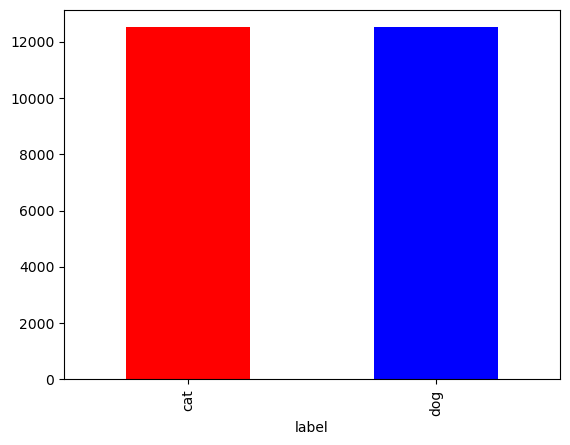

In [7]:
data.label.value_counts().plot.bar(color = ['red','blue'])
plt.show()

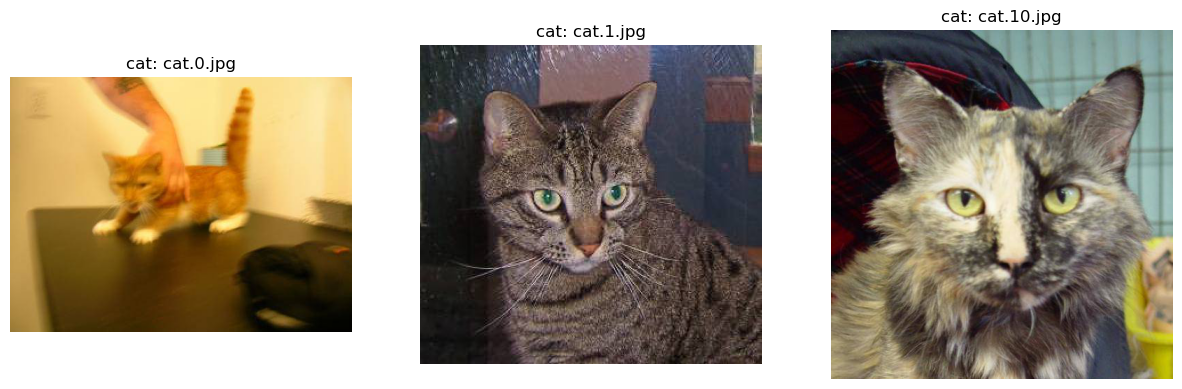

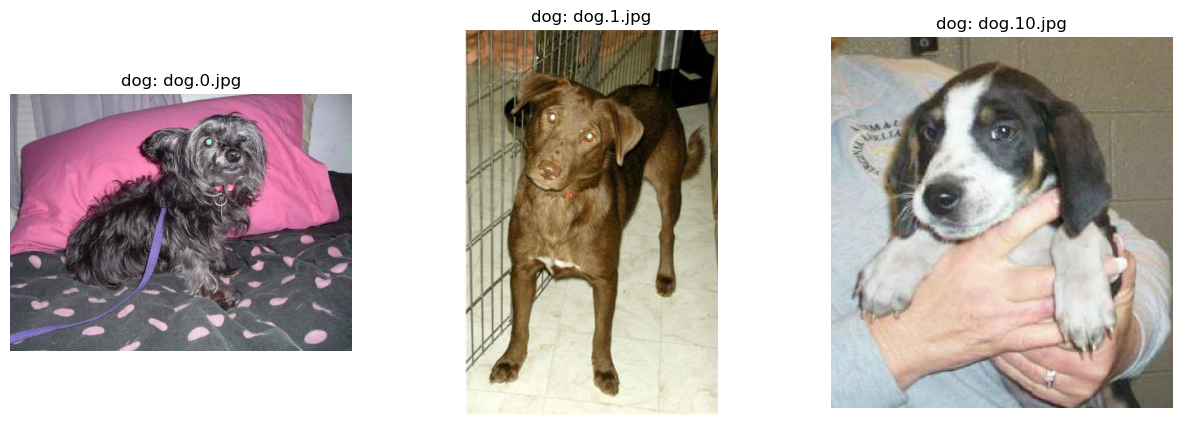

In [8]:
base_dir = '/project/train/train/'

def display_images(data, label, num_images=3):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    
    # Filter the DataFrame for the label and limit the results
    filtered_data = data[data['label'] == label].head(num_images)
    
    for i, (idx, row) in enumerate(filtered_data.iterrows()):
        img_path = base_dir + row['ImageName']
        try:
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].set_title(f"{label}: {row['ImageName']}")
            axs[i].axis('off')
        except FileNotFoundError:
            print(f"File not found: {img_path}")
        except IOError:
            print(f"Cannot open file: {img_path}")

display_images(data, 'cat')

display_images(data, 'dog')

plt.show()


In [9]:
labels = data['label']

X_train, X_valid = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)


print('The shape of train data',X_train.shape)
print('The shape of test data',X_valid.shape)

The shape of train data (20000, 2)
The shape of test data (5000, 2)


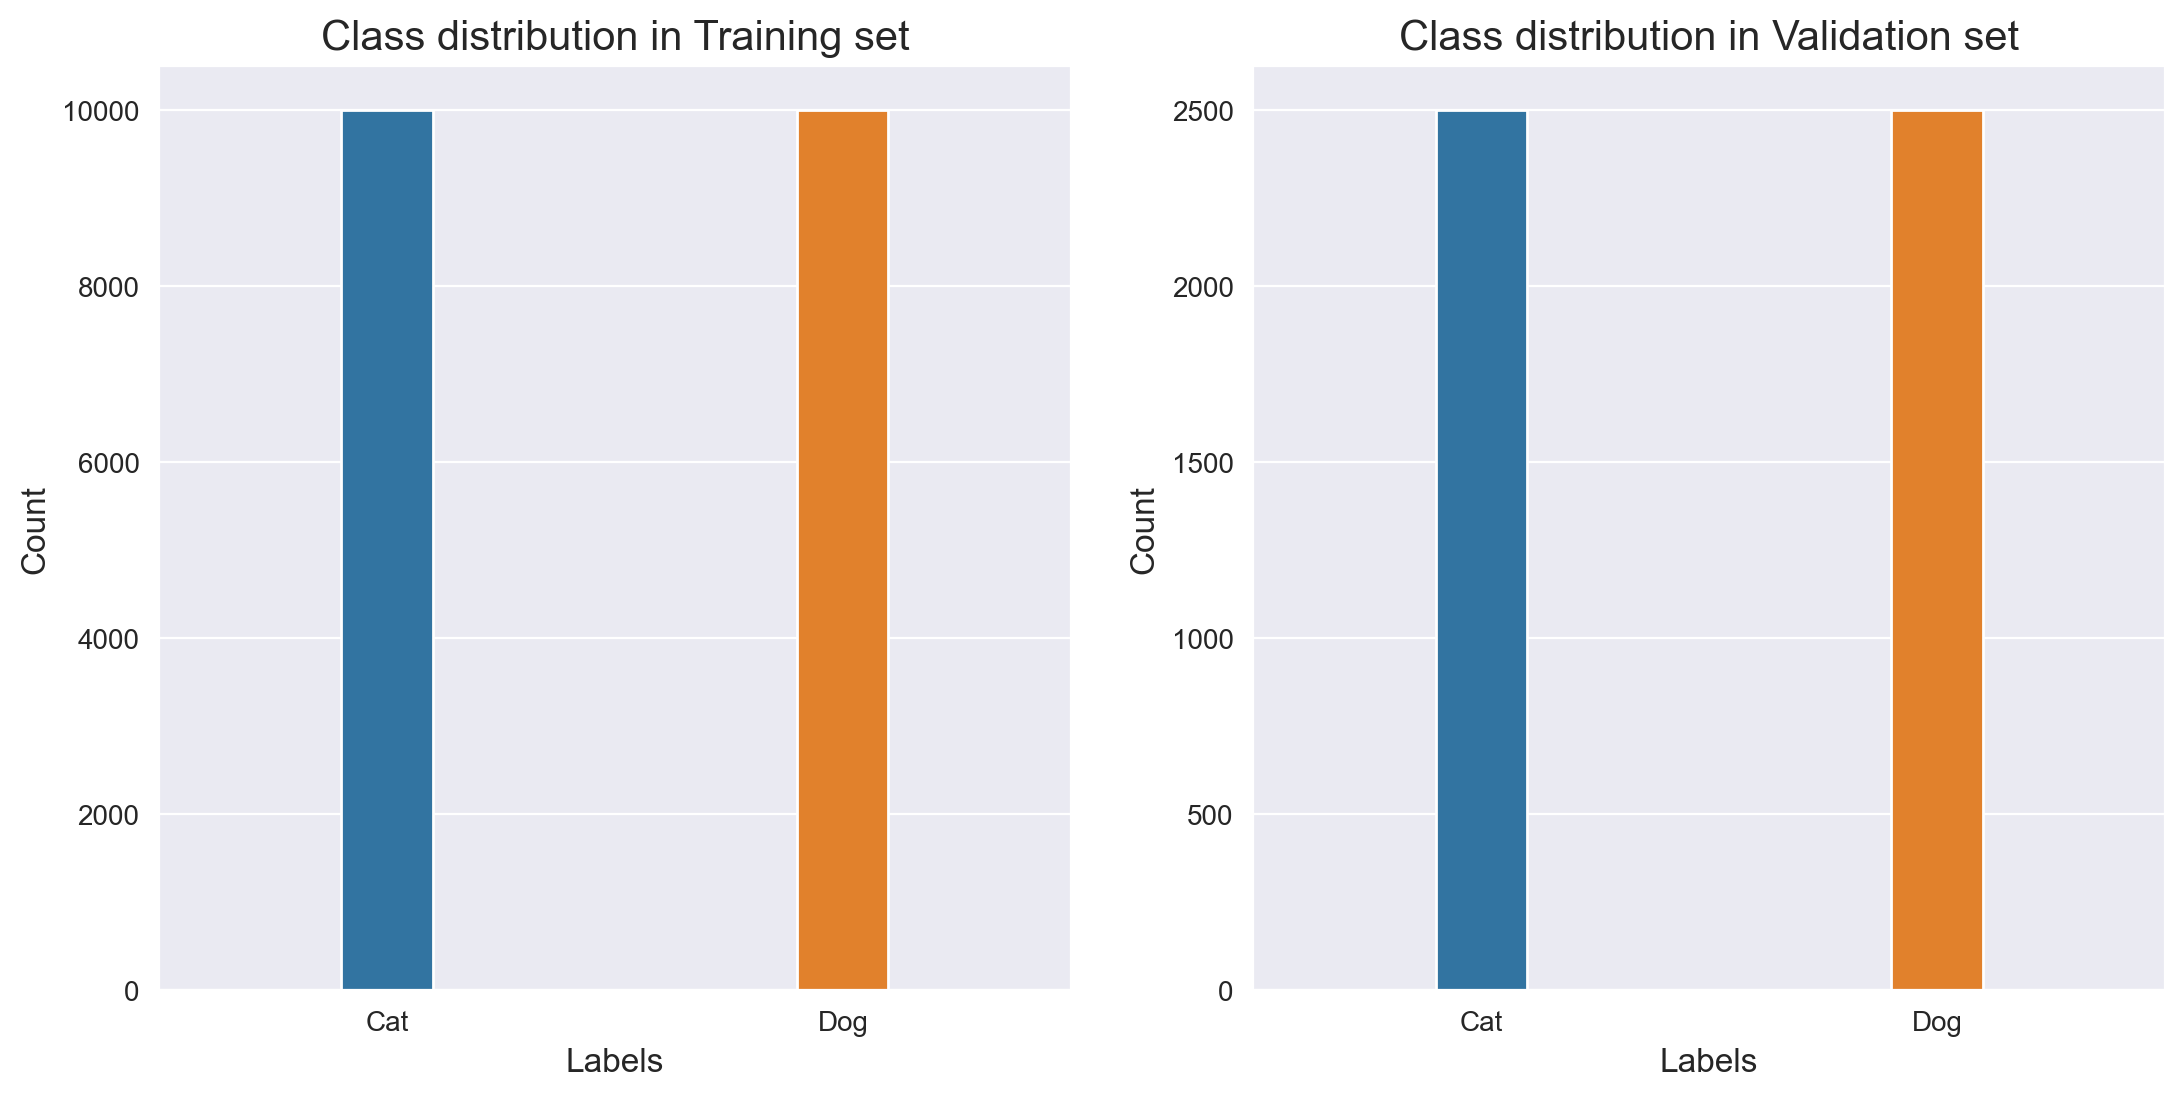

In [10]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_valid.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',width=0.2).set_title('Class distribution in Validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

In [11]:
X_valid.head()

ImageName label
15626  dog.1561.jpg   dog
18778  dog.4399.jpg   dog
8927   cat.6783.jpg   cat
3998   cat.2346.jpg   cat
15287  dog.1256.jpg   dog

In [12]:
X_train.head()

ImageName label
20022   dog.5518.jpg   dog
4993    cat.3241.jpg   cat
24760   dog.9783.jpg   dog
13775  dog.11144.jpg   dog
20504   dog.5952.jpg   dog

In [13]:
train_dir = '/project/train/train/train_data'
val_dir = '/project/train/train/valid_data'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create directories for cats and dogs within training and validation directories
for category in ['cat', 'dog']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Function to sort images based on label
def sort_images(df, base_dir, original_dir):
    for _, row in df.iterrows():
        file_label = 'cat' if row['label'] == 'cat' else 'dog'
        file_source = original_dir + row['ImageName']
        file_destination = base_dir +'/' + file_label + '/' + row['ImageName']
        
        # Check if the file exists and print path for debugging
        if os.path.exists(file_source):
            print(f"Copying from {file_source} to {file_destination}")
            try:
                shutil.copy(file_source, file_destination)
            except PermissionError as e:
                print(f"Permission error: {e} when accessing {file_source}")
            except Exception as e:
                print(f"Error: {e}")
        else:
            print(f"File {file_source} not found.")
            
        

# Assuming all images are currently stored in these directories
original_train_dir = base_dir  # Adjust as needed
original_val_dir = base_dir  # Adjust as needed

# Sort training and validation images
sort_images(X_train, train_dir, original_train_dir)
sort_images(X_valid, val_dir, original_val_dir)



Copying from /project/train/train/dog.5518.jpg to /project/train/train/train_data/dog/dog.5518.jpg
Copying from /project/train/train/cat.3241.jpg to /project/train/train/train_data/cat/cat.3241.jpg
Copying from /project/train/train/dog.9783.jpg to /project/train/train/train_data/dog/dog.9783.jpg
Copying from /project/train/train/dog.11144.jpg to /project/train/train/train_data/dog/dog.11144.jpg
Copying from /project/train/train/dog.5952.jpg to /project/train/train/train_data/dog/dog.5952.jpg
Copying from /project/train/train/dog.2050.jpg to /project/train/train/train_data/dog/dog.2050.jpg
Copying from /project/train/train/cat.9679.jpg to /project/train/train/train_data/cat/cat.9679.jpg
Copying from /project/train/train/dog.5757.jpg to /project/train/train/train_data/dog/dog.5757.jpg
Copying from /project/train/train/dog.3545.jpg to /project/train/train/train_data/dog/dog.3545.jpg
Copying from /project/train/train/dog.5327.jpg to /project/train/train/train_data/dog/dog.5327.jpg
Copying 

In [14]:
path1 = "/project/train/train/train_data/cat"
path2 = "/project/train/train/train_data/dog"
path3 = "/project/train/train/valid_data/cat"
path4 = "/project/train/train/valid_data/dog"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))

Then number of cat images in training data is 10000
Then number of dog images in training data is 10000
Then number of cat images in validation data is 2500
Then number of dog images in validation data is 2500


In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe( X_train, 
    base_dir, 
    x_col='ImageName',
    y_col='label',
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)

valid_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_generator = valid_datagen.flow_from_dataframe( X_valid, 
    base_dir, 
    x_col='ImageName',
    y_col='label',
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# CNN models

In [17]:
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Fourth convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the results to feed into a DNN
    Flatten(),
    
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    
    # Output layer with binary classification
    Dense(1, activation='sigmoid')
])

# Model summary
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [18]:
cat_dog = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs = 10,
                   )

Epoch 1/10


1000/1000 [==============================] - 382s 379ms/step - loss: 0.6833 - accuracy: 0.5572 - val_loss: 0.6466 - val_accuracy: 0.6188
Epoch 2/10
1000/1000 [==============================] - 412s 412ms/step - loss: 0.6539 - accuracy: 0.6045 - val_loss: 0.6432 - val_accuracy: 0.6234
Epoch 3/10
1000/1000 [==============================] - 402s 402ms/step - loss: 0.6026 - accuracy: 0.6785 - val_loss: 0.5618 - val_accuracy: 0.7074
Epoch 4/10
1000/1000 [==============================] - 386s 386ms/step - loss: 0.5634 - accuracy: 0.7118 - val_loss: 0.5445 - val_accuracy: 0.7250
Epoch 5/10
1000/1000 [==============================] - 353s 354ms/step - loss: 0.5384 - accuracy: 0.7294 - val_loss: 0.6056 - val_accuracy: 0.7114
Epoch 6/10
1000/1000 [==============================] - 344s 344ms/step - loss: 0.5085 - accuracy: 0.7531 - val_loss: 0.4958 - val_accuracy: 0.7590
Epoch 7/10
1000/1000 [==============================] - 343s 343ms/step - loss: 0.4803 - accuracy: 0.7734 - va

In [39]:
cat_dog = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs = 10,
                   )

Epoch 1/10
1000/1000 [==============================] - 397s 397ms/step - loss: 0.3852 - accuracy: 0.8288 - val_loss: 0.3827 - val_accuracy: 0.8244
Epoch 2/10
1000/1000 [==============================] - 438s 438ms/step - loss: 0.3753 - accuracy: 0.8327 - val_loss: 0.4199 - val_accuracy: 0.8068
Epoch 3/10
1000/1000 [==============================] - 436s 436ms/step - loss: 0.3637 - accuracy: 0.8392 - val_loss: 0.3494 - val_accuracy: 0.8472
Epoch 4/10
1000/1000 [==============================] - 398s 398ms/step - loss: 0.3473 - accuracy: 0.8502 - val_loss: 0.3431 - val_accuracy: 0.8512
Epoch 5/10
1000/1000 [==============================] - 339s 339ms/step - loss: 0.3451 - accuracy: 0.8477 - val_loss: 0.3344 - val_accuracy: 0.8608
Epoch 6/10
1000/1000 [==============================] - 333s 333ms/step - loss: 0.3257 - accuracy: 0.8533 - val_loss: 0.3059 - val_accuracy: 0.8686
Epoch 7/10
1000/1000 [==============================] - 338s 338ms/step - loss: 0.3225 - accuracy: 0.8591 - val_

In [58]:
from tensorflow.keras.optimizers import RMSprop

def create_model():

    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    
    model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  
    return model

model_2 = create_model()
model_2.summary()


history = model_2.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_395 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_391 (B  (None, 148, 148, 32)      128       
 atchNormalization)                                              
                                                                 
 activation_391 (Activation  (None, 148, 148, 32)      0         
 )                                                               
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_396 (Conv2D)         (None, 72, 72, 64)        18496     
                                                      

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Create the Sequential model
model_3 = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Fourth convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the results to feed into a DNN
    Flatten(),
    
    # 512 neuron hidden layer with L2 regularization
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),  # Dropout for regularization
    
    # Output layer with binary classification
    Dense(1, activation='sigmoid')
])

# Model summary
model_3.summary()

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_3 = model_3.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_400 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_401 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_402 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 17, 17, 128)      

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the Sequential model
model_4 = Sequential([
    # First convolutional layer with dropout
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Second convolutional layer with dropout
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Third convolutional layer with dropout
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Fourth convolutional layer with dropout
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Flattening the results to feed into a DNN
    Flatten(),
    
    # Dense layer with dropout
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Output layer with binary classification
    Dense(1, activation='sigmoid')
])

# Model summary
model_4.summary()

# Compile the model
model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_4 = model_4.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 dropout_10 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout_11 (Dropout)        (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Create the Sequential model
model_5 = Sequential([
    # First convolutional layer with dropout
    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(150, 150, 3)),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Second convolutional layer with dropout
    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Third convolutional layer with dropout
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Fourth convolutional layer with dropout
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.25),
    MaxPooling2D(2, 2),
    
    # Flattening the results to feed into a DNN
    Flatten(),
    
    # Dense layer with dropout
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    
    # Output layer with binary classification
    Dense(1, activation='sigmoid')
])

# Model summary
model_5.summary()

# Compile the model
model_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_5 = model_5.fit(train_generator,
                    epochs=5,
                    validation_data=valid_generator)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_20 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 dropout_21 (Dropout)        (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                

# Model evaluation

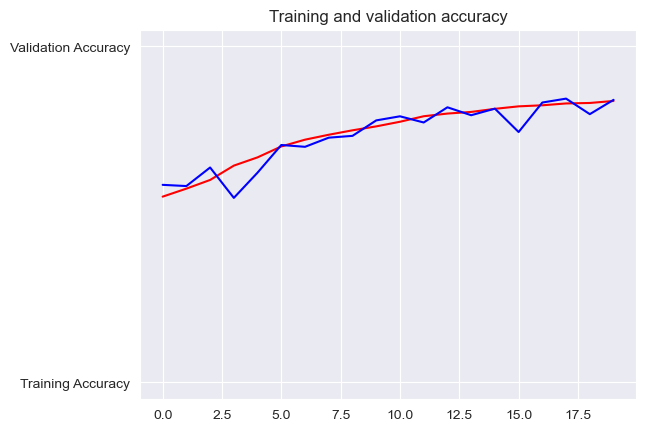

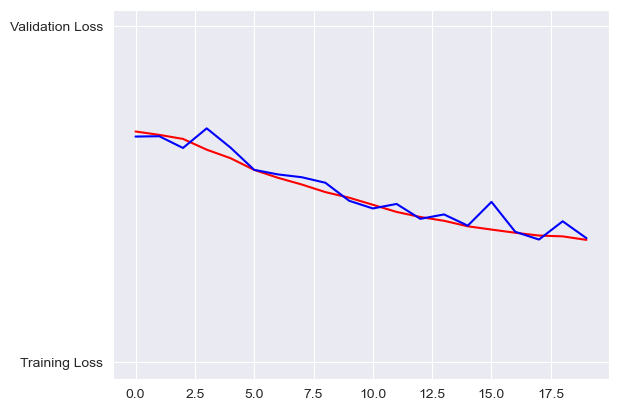

In [24]:
acc=history_4.history['accuracy']
val_acc=history_4.history['val_accuracy']
loss=history_4.history['loss']
val_loss=history_4.history['val_loss']

epochs=range(len(acc))


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

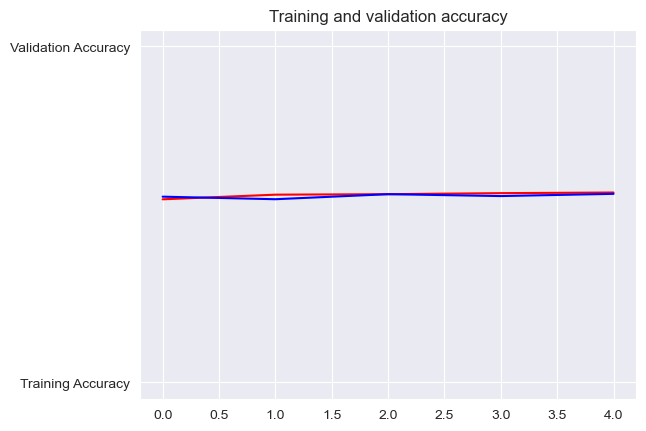

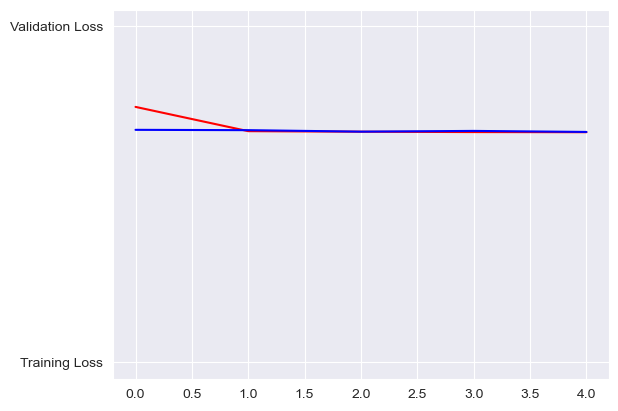

In [25]:
acc=history_5.history['accuracy']
val_acc=history_5.history['val_accuracy']
loss=history_5.history['loss']
val_loss=history_5.history['val_loss']

epochs=range(len(acc))


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [26]:
model_4.evaluate(valid_generator)

250/250 [==============================] - 40s 158ms/step - loss: 0.3685 - accuracy: 0.8522


[0.36846187710762024, 0.8521999716758728]

In [27]:
model_5.evaluate(valid_generator)

250/250 [==============================] - 40s 158ms/step - loss: 0.6868 - accuracy: 0.5620


[0.686813235282898, 0.5619999766349792]

# Testing on test Data

In [28]:
data_test = pd.DataFrame({"ImageName": img_names_test})

data_test.head()

ImageName
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg

In [34]:
test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_generator = test_datagen.flow_from_dataframe( data_test, 
    '/project/test1/test1', 
    x_col='ImageName',
    y_col=None,
    class_mode=None,
    target_size = (150, 150),
    batch_size = 20
)


Found 12500 validated image filenames.


In [36]:
predict = model_4.predict(test_generator)

625/625 [==============================] - 143s 228ms/step


In [37]:
predict.shape

(12500, 1)

In [39]:
category = np.rint(predict)
data_test['label'] = category

In [40]:
data_test

ImageName  label
0          1.jpg    0.0
1         10.jpg    0.0
2        100.jpg    1.0
3       1000.jpg    0.0
4      10000.jpg    1.0
...          ...    ...
12495   9995.jpg    0.0
12496   9996.jpg    0.0
12497   9997.jpg    1.0
12498   9998.jpg    1.0
12499   9999.jpg    0.0

[12500 rows x 2 columns]

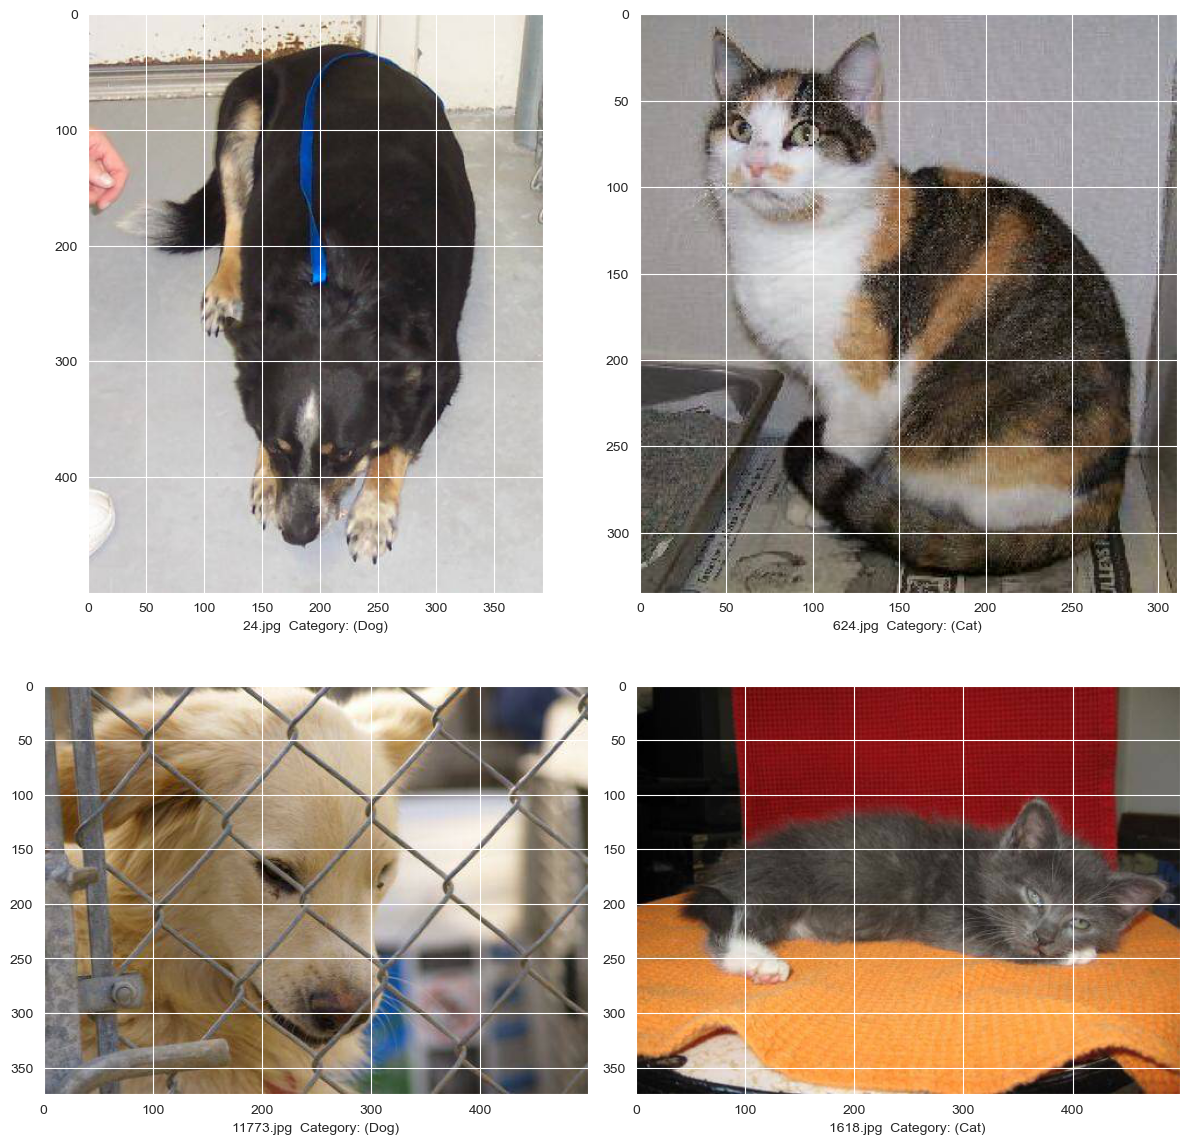

In [51]:
from PIL import Image
sample_test = data_test.sample(n=4).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['ImageName']
    category = 'Cat'if row['label']==0 else 'Dog'
    img = np.asarray(Image.open("/project/test1/test1/"+filename))
    plt.subplot(2, 2, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '  Category: (' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [52]:
final_file = data_test.copy()
final_file['id'] = final_file['ImageName'].str.split('.').str[0]
final_file.drop(['ImageName'], axis=1, inplace=True)


In [53]:
final_file

label     id
0        0.0      1
1        0.0     10
2        1.0    100
3        0.0   1000
4        1.0  10000
...      ...    ...
12495    0.0   9995
12496    0.0   9996
12497    1.0   9997
12498    1.0   9998
12499    0.0   9999

[12500 rows x 2 columns]

In [54]:
final_file_reversed = final_file[['id', 'label']]

# Displaying the reversed DataFrame
print(final_file_reversed)

          id  label
0          1    0.0
1         10    0.0
2        100    1.0
3       1000    0.0
4      10000    1.0
...      ...    ...
12495   9995    0.0
12496   9996    0.0
12497   9997    1.0
12498   9998    1.0
12499   9999    0.0

[12500 rows x 2 columns]


In [55]:
final_file_reversed['label'] = final_file_reversed['label'].astype(int)

In [56]:
final_file_reversed

id  label
0          1      0
1         10      0
2        100      1
3       1000      0
4      10000      1
...      ...    ...
12495   9995      0
12496   9996      0
12497   9997      1
12498   9998      1
12499   9999      0

[12500 rows x 2 columns]

In [57]:
final_file_reversed.to_csv('submission.csv', index=False)